In [61]:
import sympy as smp
from sympy import *
import numpy as np
from numpy import *
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from scipy.integrate import odeint
from fractions import Fraction
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

x, y, t, n, a, b, C, c, r, u, s, A, i, j, k, z, w = smp.symbols('x y t n a b C c r u s A i j k z w')
f, g, m = smp.symbols('f g m', cls=smp.Function)

# 1

Write six different iterated triple integrals for the volume of the tetrahedron cut from the first octant by the plane:

12x + 4y + 3z = 12

Evaluate the first integral. 

Write an integral that represents the volume in the order dx dy dz:

Answer:

∫(0, 4) ∫(0, 3 - 3z/4) ∫(0, 1 - y/3 - z/4) 1 dx dy dz

Evaluate the integral from the previous step:

Answer:

The value of the integral is 2

Write integrals that represents the volume in five other orders:

∫(0, 4) ∫(0, 1 - z/4) ∫(0, 3 - 3x - 3z/4) 1 dy dx dz

∫(0, 3) ∫(0, 4 - 4y/3) ∫(0, (12 - 4y - 3z)/(12)) 1 dx dz dy

∫(0, 3) ∫(0, 1 - y/3) ∫(0, (12 - 12x - 4y)/(3)) 1 dz dx dy

∫(0, 1) ∫(0, 4 - 4x) ∫(0, (12 - 12x - 3z)/(4)) 1 dy dz dx

∫(0, 1) ∫(0, 3 - 3x) ∫(0, (12 - 12x - 4y)/(3)) 1 dz dy dx

In [42]:
from scipy import integrate

# Define the limits of z
z_bounds = (0, 4)

# Define the limits of y as a function of z
y_bounds = lambda z: (0, 3 - 3*z/4)

# Define the limits of x as a function of y and z
x_bounds = lambda y, z: (0, 1 - y/3 - z/4)

# Define the function to integrate
f = lambda x, y, z: 1

# Compute the triple integral
volume = integrate.nquad(f, [x_bounds, y_bounds, z_bounds])

print(volume[0])

2.0


# 2

Evaluate the integral:

∫(0, 3) ∫(0, 4pi) ∫(0, 2pi) ysin(x) dx dy dz

In [41]:
# Define the symbols
x, y, z = smp.symbols('x y z')

# Define the function to integrate
f = y * smp.sin(x)

# Perform the triple integration
# integral = smp.integrate(f, (z, 0, 2*smp.pi), (y, 0, 4*smp.pi), (x, 0, 3))
integral = smp.integrate(f, (x, 0, 3), (y, 0, 4*smp.pi), (z, 0, 2*smp.pi))

integral.simplify()

16*pi**3*(1 - cos(3))

Evaluate the integral:

∫(0, 4) ∫(0, 4pi) ∫(0, 2pi) ysin(x) dx dy dz

In [48]:
# Define the symbols
x, y, z = smp.symbols('x y z')

# Define the function to integrate
f = y * smp.sin(x)

# Perform the triple integration
integral = smp.integrate(f, (x, 0, 4), (y, 0, 4*smp.pi), (z, 0, 2*smp.pi))

integral.simplify()

16*pi**3*(1 - cos(4))

# 3

Here is the region of integration of the integral ∫(-1, 1) ∫(x^2, 1) ∫(0, 1-y) dz dy dx

Rewrite the integral as an equivalent integral in the following orders:

A: dy dz dx

B: dy dx dz

C: dx dy dz

D: dx dz dy

E: dz dx dy

# 4

Find the volume of the region between the cylinder z = 4y^2 and the xy-plane that is bounded by the planes:

x = 0, x = 4, y = -4, and y = 4

In [3]:
import scipy.integrate as spi

# Define the limits of z
def z1(x, y):
    return 0

def z2(x, y):
    return 4*y**2

# Define the limits of y
y1, y2 = -4, 4

# Define the limits of x
x1, x2 = 0, 4

# Define the function to integrate (in this case, it's 1, as we're finding volume)
def f(x, y, z):
    return 1

# Perform the triple integration
volume, error = spi.tplquad(f, x1, x2, lambda x: y1, lambda x: y2, z1, z2)

volume

# Answer = 2048 / 3

682.6666666666667

# 5

Find the average value of F(x, y, z) = x^2 + 2 over the cube in the first octant bounded by the coordinate planes and the planes:

x = 4, y = 4, z = 4

The average value of F over D is ?

In [4]:
import scipy.integrate as spi

# Define the limits of z
z1, z2 = 0, 4

# Define the limits of y
y1, y2 = 0, 4

# Define the limits of x
x1, x2 = 0, 4

# Define the function to integrate
def f(x, y, z):
    return x**2 + 2

# Perform the triple integration
integral, error = spi.tplquad(f, x1, x2, lambda x: y1, lambda x: y2, lambda x, y: z1, lambda x, y: z2)

# Calculate the volume of the cube
volume = (x2 - x1) * (y2 - y1) * (z2 - z1)

# Calculate the average value
average_value = integral / volume

average_value

7.333333333333334

# 6

Evaluate the integral:

∫(0, 9) ∫(0, 3) ∫(2y, 6) (2cos(x^2))/(5sqrt(z)) dx dy

by changing the order of integration in an appropriate way. 

In [39]:
from sympy import symbols, cos, sin, sqrt, integrate

# Define the variables
x, y, z = symbols('x y z')

# Define the function
f = 2*cos(x**2)/(5*sqrt(z))

# Perform the triple integration
result = integrate(integrate(integrate(f, (x, 2*y, 6)), (z, 0, 9)), (y, 0, 3))

# Print the result
result.simplify()

3*sin(36)/5

# 7

Find the centroid of the region in the first quadrant bounded by the x-axis, the parabola y^2 = x, and the liine x + y = 2

The coordinates of the centroid are (x, y) = ?

In [7]:
import scipy.integrate as spi
from fractions import Fraction

# Define the limits of y
y1, y2 = 0, 1

# Define the limits of x
def x1(y):
    return y**2

def x2(y):
    return 2 - y

# Define the function to integrate for the area
def f1(x, y):
    return 1

# Perform the double integration for the area
area, error = spi.dblquad(f1, y1, y2, x1, x2)

# Define the function to integrate for the x-coordinate of the centroid
def f2(x, y):
    return x

# Perform the double integration for the x-coordinate of the centroid
x_integral, error = spi.dblquad(f2, y1, y2, x1, x2)

# Calculate the x-coordinate of the centroid
x_bar = x_integral / area

# Define the function to integrate for the y-coordinate of the centroid
def f3(x, y):
    return y

# Perform the double integration for the y-coordinate of the centroid
y_integral, error = spi.dblquad(f3, y1, y2, x1, x2)

# Calculate the y-coordinate of the centroid
y_bar = y_integral / area

# Convert the coordinates to fractions
x_bar_frac = Fraction(x_bar).limit_denominator()
y_bar_frac = Fraction(y_bar).limit_denominator()

print((x_bar_frac, y_bar_frac))

(Fraction(32, 35), Fraction(5, 14))


Fraction(32, 35)

# 8

Find the mass of the solid and the center of mass if the solid region in the first octant is bounded by the coordinate planes and the plane:

x + y + z = 2

The density of the solid is δ(x, y, z) = 2x

The mass of the object is ?

In [8]:
# Mass of the object

import scipy.integrate as spi

# Define the limits of z
def z1(x, y):
    return 0

def z2(x, y):
    return 2 - x - y

# Define the limits of y
def y1(x):
    return 0

def y2(x):
    return 2 - x

# Define the limits of x
x1, x2 = 0, 2

# Define the density function
def density(x, y, z):
    return 2*x

# Perform the triple integration
mass, error = spi.tplquad(density, x1, x2, y1, y2, z1, z2)

mass

1.3333333333333333

In [10]:
# Coordinates

import scipy.integrate as spi

# Define the limits of z
def z1(x, y):
    return 0

def z2(x, y):
    return 2 - x - y

# Define the limits of y
def y1(x):
    return 0

def y2(x):
    return 2 - x

# Define the limits of x
x1, x2 = 0, 2

# Define the density function
def density(x, y, z):
    return 2*x

# Perform the triple integration for the mass
mass, error = spi.tplquad(density, x1, x2, y1, y2, z1, z2)

# Define the function to integrate for the x-coordinate of the center of mass
def f_x(x, y, z):
    return x * density(x, y, z)

# Perform the triple integration for the x-coordinate of the center of mass
x_integral, error = spi.tplquad(f_x, x1, x2, y1, y2, z1, z2)

# Calculate the x-coordinate of the center of mass
x_bar = x_integral / mass

# Define the function to integrate for the y-coordinate of the center of mass
def f_y(x, y, z):
    return y * density(x, y, z)

# Perform the triple integration for the y-coordinate of the center of mass
y_integral, error = spi.tplquad(f_y, x1, x2, y1, y2, z1, z2)

# Calculate the y-coordinate of the center of mass
y_bar = y_integral / mass

# Define the function to integrate for the z-coordinate of the center of mass
def f_z(x, y, z):
    return z * density(x, y, z)

# Perform the triple integration for the z-coordinate of the center of mass
z_integral, error = spi.tplquad(f_z, x1, x2, y1, y2, z1, z2)

# Calculate the z-coordinate of the center of mass
z_bar = z_integral / mass

# Convert the coordinates to fractions
x_bar_frac = Fraction(x_bar).limit_denominator()
y_bar_frac = Fraction(y_bar).limit_denominator()
z_bar_frac = Fraction(z_bar).limit_denominator()

print((x_bar_frac, y_bar_frac, z_bar_frac))

(Fraction(4, 5), Fraction(2, 5), Fraction(2, 5))


# 9

Sketch the graph described by the following cylindrical coordinates in 3-D space:

z = -1

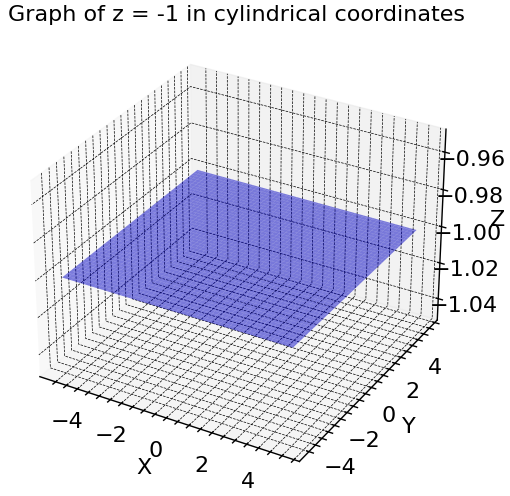

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the range of values for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# Create a grid of values for x and y
x, y = np.meshgrid(x, y)

# Set z to -1
z = -1 * np.ones_like(x)

# Plot the surface
ax.plot_surface(x, y, z, color='b', alpha=0.5)

# Set the labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Graph of z = -1 in cylindrical coordinates')

plt.show()

# 10

Evaluate the cylindrical coordinate integral:

∫(0, 2pi) ∫(0, theta/pi) ∫(0, 4+25r^2) dz r dr d(theta)

In [29]:
# Numerical

from scipy import integrate

# Define the integrand
def f(z, r, theta):
    return r

# Define the limits for z
def z_lim(r, theta):
    return [0, 4 + 25 * r**2]

# Define the limits for r
def r_lim(theta):
    return [0, theta/np.pi]

# Define the limits for theta
theta_lim = [0, 2 * np.pi]

# Perform the triple integral
result, error = integrate.nquad(f, [z_lim, r_lim, theta_lim])

print(f"The result is {result} with an error of {error}")

The result is 142.41886696273733 with an error of 2.2801060720398165e-12


In [31]:
# Symbolic

from sympy import symbols, integrate, pi

# Define the symbols
z, r, theta = symbols('z r theta')

# Define the integrand
f = r

# Perform the triple integral
result = integrate(integrate(integrate(f, (z, 0, 4 + 25 * r**2)), (r, 0, theta/pi)), (theta, 0, 2*pi))

print("The result is:")
result

The result is:


136*pi/3

# 11

Evaluate the following integral:

∫(0, 2pi) ∫(0, 2) ∫(0, z/2) r^3 dr dz d(theta)

In [32]:
from sympy import symbols, integrate, pi

# Define the symbols
r, z, theta = symbols('r z theta')

# Define the integrand
f = r**3

# Perform the triple integral
result = integrate(integrate(integrate(f, (r, 0, z/2)), (z, 0, 2)), (theta, 0, 2*pi))

print("The result is:")
result

The result is:


pi/5

# 12

Evaluate the spherical coordinate integral:

∫(0, 2pi) ∫(pi, 2pi) ∫(0, 1-cos(phi)) (rho^2)sin(phi) d(rho) d(phi) d(theta)

In [60]:
from sympy import symbols, integrate, sin, cos, pi

# Define the symbols
rho, phi, theta = symbols('rho phi theta')

# Define the integrand
f = (rho**2)*sin(phi)

# Perform the triple integral
result = integrate(integrate(integrate(f, (rho, 0, 1 - cos(phi))), (phi, pi, 2*pi)), (theta, 0, 2*pi))

print("The result is:")
result.simplify()

The result is:


-8*pi/3

# 13

Evaluate the integral:

∫(0, 3) ∫(-2pi, 0) ∫(pi/4, pi/2) ρ^2 sin2φ (dφ dθ dρ)

In [71]:
# FIXME

# 14

Find the volume of the solid bounded by z = 7 - 7(x^2 + y^2) and z = ((x^2 + y^2)^2) - 1

In [104]:
from sympy import symbols, pi, integrate

# Define the symbols
r, theta = symbols('r theta')

# Define the functions z1 and z2
z1 = 7 - 7*r**2
z2 = r**4 - 1

# Define the volume integral
V = integrate(integrate((z1 - z2)*r, (r, 0, 1)), (theta, 0, 2*pi))

# Print the result
V

25*pi/6

# 15

A solid is bounded below by the cone z = sqrt(x^2 + y^2) and above by the plane z = 1

Find the center of mass and the moment of inertia about the z-axis if the density is ∂(r, theta, z) = 4z

In [61]:
# Center of Mass

from scipy.integrate import tplquad

# Define the density function
def rho(r, theta, z):
    return 4*z

# Define the limits of z
def z1(r, theta):
    return r

def z2(r, theta):
    return 1

# Compute the mass
M, _ = tplquad(lambda z, theta, r: rho(r, theta, z)*r, 0, 1, lambda r: 0, lambda r: 2*np.pi, z1, z2)

# Compute the coordinates of the center of mass
x_bar, _ = tplquad(lambda z, theta, r: rho(r, theta, z)*r*r*np.cos(theta), 0, 1, lambda r: 0, lambda r: 2*np.pi, z1, z2)
y_bar, _ = tplquad(lambda z, theta, r: rho(r, theta, z)*r*r*np.sin(theta), 0, 1, lambda r: 0, lambda r: 2*np.pi, z1, z2)
z_bar, _ = tplquad(lambda z, theta, r: rho(r, theta, z)*r*z, 0, 1, lambda r: 0, lambda r: 2*np.pi, z1, z2)

x_bar /= M
y_bar /= M
z_bar /= M

print(f'Center of mass: ({x_bar}, {y_bar}, {z_bar})')

# Answer:
# (0, 0, 4/5)

Center of mass: (1.9578719746459672e-17, 1.978908710411622e-17, 0.8)


In [103]:
# Moment of Inertia

from sympy import symbols, integrate, pi

# Define the symbols
r, theta, z = symbols('r theta z')

# Define the density function
density = 4*z

# Define the volume element in cylindrical coordinates
dV = r

# Define the integrand for the moment of inertia
integrand = r**2 * density * dV

# Perform the triple integral
Iz = integrate(integrand, (z, r, 1), (r, 0, 1), (theta, 0, 2*pi))

# Print the result
display(Iz)

pi/3

# 16

A: Solve the system u = 2x - y, v = 3x + 3y for x and y in terms of u and v

B: Then find the value of the Jacobian ((∂(x, y)) / (∂(u, v)))

C: Find the image under the transformation of the triangular region with vertices (0, 0), (3, 6), and (3, -3) in the xy-plane. Sketch the transformed region in the uv-plane.

In [32]:
# A:

from sympy import symbols, Eq, solve

# Define the variables
x, y, u, v = symbols('x y u v')

# Define the equations
eq1 = Eq(u, 2*x - y)
eq2 = Eq(v, 3*x + 3*y)

# Solve the system of equations
solution = solve((eq1, eq2), (x, y))

solution

{x: u/3 + v/9, y: -u/3 + 2*v/9}

In [33]:
# B

from sympy import symbols, Matrix

# Define the variables
x, y, u, v = symbols('x y u v')

# Define the transformations
x = (3*u + v) / 9
y = (-3*u + 2*v) / 9

# Compute the Jacobian matrix
J = Matrix([[x.diff(u_), y.diff(u_)] for u_ in (u, v)])

# Compute the determinant
det_J = J.det()

det_J

1/9

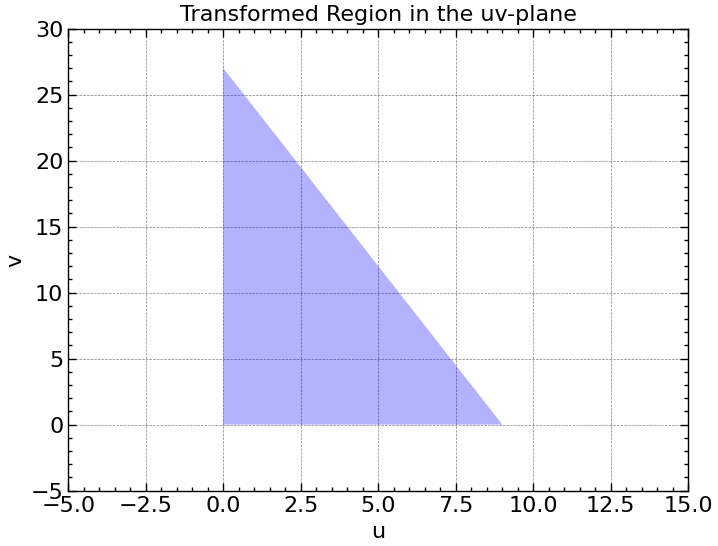

In [34]:
# C

import matplotlib.pyplot as plt

# Define the vertices of the transformed triangle
vertices = [(0, 0), (0, 27), (9, 0)]

# Create a new figure
plt.figure()

# Plot the triangle
plt.fill(*zip(*vertices), 'b', alpha=0.3)

# Label the axes
plt.xlabel('u')
plt.ylabel('v')

# Set the limits of the axes
plt.xlim(-5, 15)
plt.ylim(-5, 30)

# Add a title
plt.title('Transformed Region in the uv-plane')

# Display the plot
plt.show()

# 17

Evaluate the integral directly by integration with respect to x and y.

∫(0, 7) ∫(x = y/5, x = (y/5)+1)  ((5x - y) / 5) dxdy

In [26]:
from sympy import symbols, integrate

# Define the variables
x, y = symbols('x y')

# Define the integrand
f = ((5*x - y) / 5)

# Perform the integral with respect to x
int_x = integrate(f, (x, y/5, y/5 + 1))

# Perform the integral with respect to y
int_y = integrate(int_x, (y, 0, 7))

print("Integral with respect to x:")
display(int_x.simplify())

print("Integral with respect to y:")
display(int_y)

Integral with respect to x:


1/2

Integral with respect to y:


7/2

# 18

A thin plate of constant density covers the region bounded by the ellipse, described by the equation below, in the xy-plane.

Find the second moment of the plate about the origin

Hint: Use the transformation x = ar cos(theta), y = br sin(theta)

(x^2 / a^2) + (y^2 / b^2) = 1

a > 0, b > 0

ANSWER:

The second moment of the plate about the origin is: result

In [22]:
from sympy import symbols, integrate, cos, sin, pi

# Define the variables
a, b, r, theta = symbols('a b r theta')

# Define the integrand
f = a * b * r**3 * (a**2 * cos(theta)**2 + b**2 * sin(theta)**2)

# Perform the double integral
result = integrate(integrate(f, (r, 0, 1)), (theta, 0, 2*pi))

result.simplify()

pi*a*b*(a**2 + b**2)/4

# 19

Evaluate the integral by integrating with respect to x, y, and z:

∫(0, 24) ∫(0, 2) ∫(x = y/4, x = y/4 + 1)  (((4x-y)/4) + z/6) dx dy dz

In [18]:
# Integral with respect to x

from sympy import symbols, integrate

# Define the variables
x, y, z = symbols('x y z')

# Define the integrand
f = ((4*x - y)/4 + z/6)

# Perform the integral with respect to x
int_x = integrate(f, (x, y/4, y/4 + 1))

print('Integral with respect to x:')
int_x.simplify()

Integral with respect to x:


z/6 + 1/2

In [19]:
# Integral with respect to y

from sympy import symbols, integrate

# Define the variables
x, y, z = symbols('x y z')

# Define the integrand
f = ((4*x - y)/4 + z/6)

# Perform the integral with respect to x
int_x = integrate(f, (x, y/4, y/4 + 1))

# Perform the integral with respect to y
int_y = integrate(int_x, (y, 0, 2))

print('Integral with respect to y:')
int_y.simplify()

Integral with respect to y:


z/3 + 1

In [20]:
# Final Integral
# Integral with respect to z

from sympy import symbols, integrate

# Define the variables
x, y, z = symbols('x y z')

# Define the integrand
f = ((4*x - y)/4 + z/6)

# Perform the triple integral
result = integrate(integrate(integrate(f, (x, y/4, y/4 + 1)), (y, 0, 2)), (z, 0, 24))

result

120

# 20

Find the Jacobian ∂(x, y, z) / ∂(u, v, w) of the transformations below:

A: x = ucos(v), y = 5usin(v), z = 7w

B: x = 6u - 1, y = 5v - 3, z = (w - 5) / 2

In [10]:
# A

from sympy import symbols, cos, sin, Matrix

# Define the variables
u, v, w = symbols('u v w')

# Define the transformation
x = u*cos(v)
y = 5*u*sin(v)
z = 7*w

# Compute the Jacobian matrix
J = Matrix([[x.diff(u_), y.diff(u_), z.diff(u_)] for u_ in (u, v, w)])

# Compute the determinant
det_J = J.det()

det_J.simplify()

35*u

In [11]:
# B

from sympy import symbols, cos, sin, Matrix

# Define the variables
u, v, w = symbols('u v w')

# Define the transformation
x = 6*u - 1
y = 5*v - 3
z = (w-5)/2

# Compute the Jacobian matrix
J = Matrix([[x.diff(u_), y.diff(u_), z.diff(u_)] for u_ in (u, v, w)])

# Compute the determinant
det_J = J.det()

det_J.simplify()

15

Find the Jacobian ∂(x, y, z) / ∂(u, v, w) of the transformations below:

A: x = 4ucos(v), y = 2usin(v), z = 4w

B: x = 4u - 1, y = 7v - 6, z = (w-5)/3

In [12]:
# A

from sympy import symbols, cos, sin, Matrix

# Define the variables
u, v, w = symbols('u v w')

# Define the transformation
x = 4*u*cos(v)
y = 2*u*sin(v)
z = 4*w

# Compute the Jacobian matrix
J = Matrix([[x.diff(u_), y.diff(u_), z.diff(u_)] for u_ in (u, v, w)])

# Compute the determinant
det_J = J.det()

det_J.simplify()

32*u

In [13]:
# B

from sympy import symbols, cos, sin, Matrix

# Define the variables
u, v, w = symbols('u v w')

# Define the transformation
x = 4*u - 1
y = 7*v - 6
z = (w-5)/3

# Compute the Jacobian matrix
J = Matrix([[x.diff(u_), y.diff(u_), z.diff(u_)] for u_ in (u, v, w)])

# Compute the determinant
det_J = J.det()

det_J.simplify()

28/3